In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 72.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.9 MB/s eta 0:0

In [2]:
#Version Check
import pycaret
pycaret.__version__

'3.1.0'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np


dataset-https://www.kaggle.com/datasets/shivam2503/diamonds.

Analyze diamonds by their cut, color, clarity, price, and other attributes.

In [8]:
#reading the data
data = pd.read_csv('/content/drive/MyDrive/Pycaret_Assignment/diamonds.csv')


In [14]:
#Target
data['Target'] = data.z

In [15]:
# import RegressionExperiment and init the class
from pycaret.regression import RegressionExperiment


In [16]:
exp = RegressionExperiment()

In [17]:
#set exp
exp.setup(data,target="Target",normalize=True,session_id=500)

,Description,Value
0,Session id,500
1,Target,Target
2,Target type,Regression
3,Original data shape,"(53940, 12)"
4,Transformed data shape,"(53940, 29)"
5,Transformed train set shape,"(37758, 29)"
6,Transformed test set shape,"(16182, 29)"
7,Numeric features,8
8,Categorical features,3
9,Preprocess,True


In [18]:
#compare baseline model
baseline_model = exp.compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,03:53:35
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.4280
ridge,Ridge Regression,0.0000,0.0000,0.0001,1.0000,0.0000,0.0000,0.2740
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.5030
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.2740
br,Bayesian Ridge,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.3070
huber,Huber Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.3990
par,Passive Aggressive Regressor,0.0247,0.0009,0.0304,0.9981,0.0071,0.0073,0.4400
rf,Random Forest Regressor,0.0015,0.0211,0.0839,0.9666,0.0089,0.0002,12.8990
knn,K Neighbors Regressor,0.0574,0.0291,0.1382,0.9516,0.0312,0.0162,1.3630
dt,Decision Tree Regressor,0.0016,0.0342,0.0919,0.9389,0.0083,0.0002,0.4060


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.4280
ridge,Ridge Regression,0.0000,0.0000,0.0001,1.0000,0.0000,0.0000,0.2740
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.5030
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.2740
br,Bayesian Ridge,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.3070
huber,Huber Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.3990
par,Passive Aggressive Regressor,0.0247,0.0009,0.0304,0.9981,0.0071,0.0073,0.4400
lightgbm,Light Gradient Boosting Machine,0.0047,0.0194,0.0753,0.9708,0.0114,0.0010,1.8290
et,Extra Trees Regressor,0.0017,0.0198,0.0645,0.9707,0.0126,0.0002,11.6100
gbr,Gradient Boosting Regressor,0.0050,0.0196,0.0771,0.9689,0.0080,0.0012,6.9970


In [19]:
baseline_model

LinearRegression(n_jobs=-1)

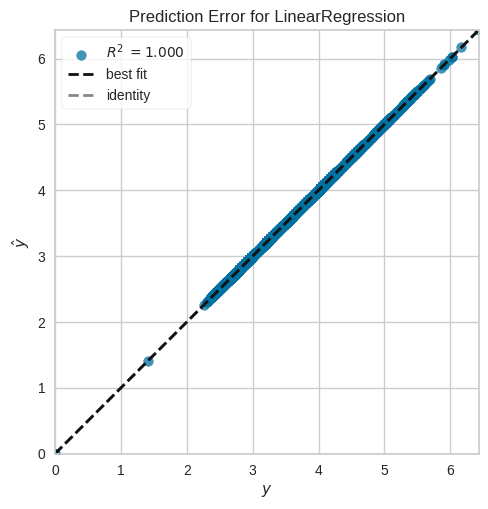

In [21]:
exp.plot_model(baseline_model,plot="error")

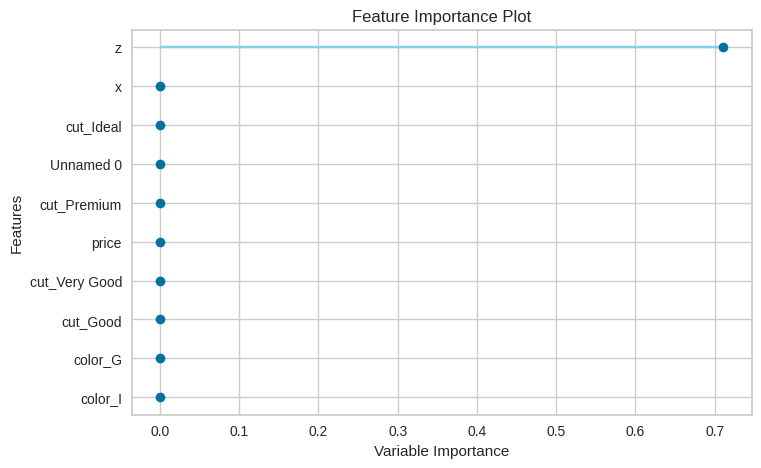

In [22]:
exp.plot_model(baseline_model,plot="feature")#feature importance

In [23]:

exp.evaluate_model(baseline_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [24]:
#outliner data
baseline_model_pred = exp.predict_model(baseline_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


In [25]:
baseline_model_pred.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,Target,prediction_label
23861,23862,2.01,Good,I,VS2,64.300003,60.0,11954,7.91,7.86,5.07,5.07,5.07
2682,2683,0.72,Ideal,F,SI1,60.200001,57.0,3242,5.83,5.86,3.52,3.52,3.52
47461,47462,0.53,Ideal,D,VS2,61.200001,55.0,1857,5.21,5.25,3.20,3.20,3.20
3232,3233,0.74,Premium,D,VS2,59.299999,60.0,3353,5.89,5.91,3.50,3.50,3.50
5833,5834,0.90,Good,G,VS2,62.900002,62.0,3918,6.02,6.06,3.80,3.80,3.80


The Model has MAE of 0.3, impling that in an acerage the model is off by $300k when predicting the median household price

In [32]:
#saving the mode
exp.save_model(baseline_model,'/content/drive/MyDrive/Pycaret_Assignment')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Unnamed: 0', 'carat', 'depth',
                                              'table', 'price', 'x', 'y', 'z'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['cut', 'color', 'clarity'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['cut', 'color', 'clarity'],
                                     transformer=OneHotEncoder(cols=['cut',
                                                                     'color',
                                                                     'clarity'],
                                                               handle_missing='return_nan',
                                                  

In [27]:
#load the saved model and use it for predicting on the entire dataset

In [28]:
from pycaret.regression import load_model, predict_model

In [33]:
model = load_model('/content/drive/MyDrive/Pycaret_Assignment')
model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Unnamed: 0', 'carat', 'depth',
                                             'table', 'price', 'x', 'y', 'z'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['cut', 'color', 'clarity'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['cut', 'color', 'clarity'],
                                    transformer=OneHotEncoder(cols=['cut',
                                                                    'color',
                                                                    'clarity'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model', LinearRegression(n_jobs=-1))])

In [30]:
#dropping target
df= data.drop(['Target'],axis=1)

In [31]:
#making predictions
pred = predict_model(model,data=df)
pred.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,prediction_label
0,1,0.23,Ideal,E,SI2,61.500000,55.0,326,3.95,3.98,2.43,2.43
1,2,0.21,Premium,E,SI1,59.799999,61.0,326,3.89,3.84,2.31,2.31
2,3,0.23,Good,E,VS1,56.900002,65.0,327,4.05,4.07,2.31,2.31
3,4,0.29,Premium,I,VS2,62.400002,58.0,334,4.20,4.23,2.63,2.63
4,5,0.31,Good,J,SI2,63.299999,58.0,335,4.34,4.35,2.75,2.75


Reference:
[1] https://github.com/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Regression.ipynb